<h2>COVID-19 in India</h2>
<lb>
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib_inline as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_details=pd.read_csv("StatewiseTestingDetails.csv")
test_details.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [4]:
test_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [5]:
test_details['Negative']=test_details['Negative'].fillna(value=0)
test_details['Positive']=test_details['Positive'].fillna(value=0)

In [6]:
test_details['Negative']=pd.to_numeric(test_details['Negative'],errors = 'coerce')
test_details['Date']=pd.to_datetime(test_details['Date'],errors = 'coerce')
test_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16336 non-null  datetime64[ns]
 1   State         16336 non-null  object        
 2   TotalSamples  16336 non-null  float64       
 3   Negative      16335 non-null  float64       
 4   Positive      16336 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 638.2+ KB


In [7]:
test_details.describe()

,Date,TotalSamples,Negative,Positive
count,16336,1.633600e+04,1.633500e+04,1.633600e+04
mean,2020-12-12 01:19:20.039177216,5.376466e+06,7.972063e+05,1.959190e+04
min,2020-04-01 00:00:00,5.800000e+01,0.000000e+00,0.000000e+00
25%,2020-08-12 00:00:00,1.729098e+05,0.000000e+00,0.000000e+00
50%,2020-12-11 00:00:00,9.307580e+05,0.000000e+00,0.000000e+00
75%,2021-04-15 00:00:00,7.284795e+06,2.953995e+05,7.450000e+02
max,2021-08-10 00:00:00,6.789786e+07,8.356103e+07,1.638961e+06
std,NaN,8.780338e+06,2.464546e+06,1.021018e+05


In [8]:
sum1=test_details['Negative'].sum()
sum2=test_details['Positive'].sum()
sum1+sum2

13342418578.0

In [9]:
test_details['Positive'].sum()

320053246.0

In [10]:
test_details['Negative'].sum()

13022365332.0

In [11]:
test_details['TotalSamples'].sum()


87829949447.0

The TOTAL NUMBER OF SAMPLES that were taken from 4th January 2020 to 8th October 2021 are 87829949447. Out of which 320053246 are POSITIVE TEST CASES and 13022365332 are NEGATIVE TEST CASES. Hence for about 74487530869 ,results are UNKNOWN.

In [12]:
test_details['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [13]:
test_details.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        1
Positive        0
dtype: int64

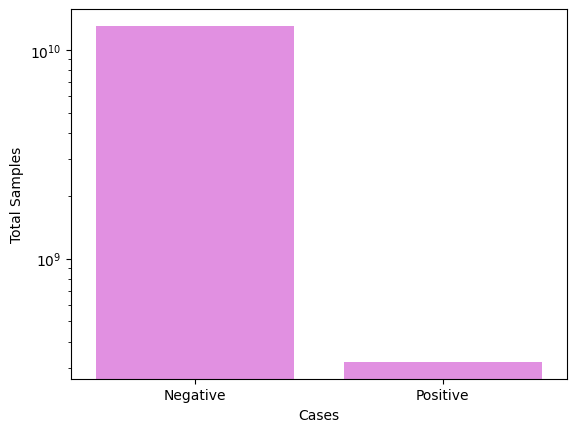

In [103]:
sum1=test_details['Negative'].sum()
sum2=test_details['Positive'].sum()
barplot=sns.barplot(x=['Negative','Positive'],y=[sum1,sum2],color='violet')
barplot.set_yscale("log")
barplot.set(xlabel="Cases", ylabel="Total Samples")

plt.show()

We can clearly see that the ratio of POSITIVE cases and NEGATIVE cases is very large. The number of uninfected was very large.

In [15]:
states=test_details.groupby('State')['TotalSamples'].sum()
states.head()

State
Andaman and Nicobar Islands    8.747008e+07
Andhra Pradesh                 4.967773e+09
Arunachal Pradesh              1.636096e+08
Assam                          2.853509e+09
Bihar                          7.392796e+09
Name: TotalSamples, dtype: float64

In [16]:
states.columns=['State','Total']
states.head()

State
Andaman and Nicobar Islands    8.747008e+07
Andhra Pradesh                 4.967773e+09
Arunachal Pradesh              1.636096e+08
Assam                          2.853509e+09
Bihar                          7.392796e+09
Name: TotalSamples, dtype: float64

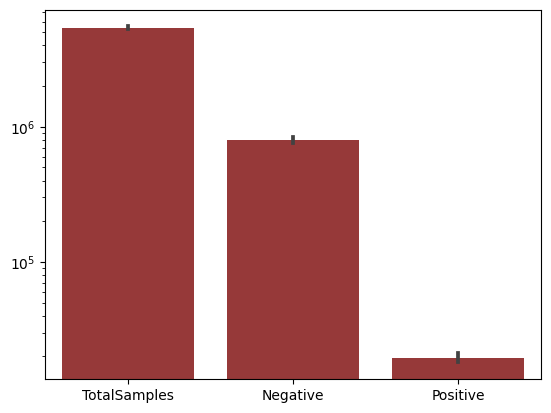

In [105]:
plot2=sns.barplot(data=test_details,color='brown')
plot2.set_yscale("log")

Now we will be looking at another dataset whch has the state wise stats of cured,infected patients along with the data and time stamp. 

In [18]:
stats=pd.read_csv('covid_19_india.csv')
stats.head()

C:\Users\aditi\AppData\Local\Temp\ipykernel_18528\2350465204.py:1: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stats=pd.read_csv('covid_19_india.csv')


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30-01-2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31-01-2020,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01-02-2020,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02-02-2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03-02-2020,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [19]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       18110 non-null  float64
 1   Date                      18110 non-null  object 
 2   Time                      18110 non-null  object 
 3   State/UnionTerritory      18110 non-null  object 
 4   ConfirmedIndianNational   18111 non-null  object 
 5   ConfirmedForeignNational  18110 non-null  object 
 6   Cured                     18110 non-null  float64
 7   Deaths                    18110 non-null  float64
 8   Confirmed                 18110 non-null  float64
dtypes: float64(4), object(5)
memory usage: 72.0+ MB


In [20]:
stats.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [21]:
stats['Date']=pd.to_datetime(stats['Date'])


C:\Users\aditi\AppData\Local\Temp\ipykernel_18528\3047586690.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stats['Date']=pd.to_datetime(stats['Date'])


In [22]:
stats['ConfirmedForeignNational']=stats['ConfirmedForeignNational'].replace("-",0)
stats['ConfirmedIndianNational']=stats['ConfirmedIndianNational'].replace("-",0)
stats['ConfirmedForeignNational']=pd.to_numeric(stats['ConfirmedForeignNational'])
stats['ConfirmedIndianNational']=pd.to_numeric(stats['ConfirmedIndianNational'])


In [23]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  float64       
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18111 non-null  float64       
 5   ConfirmedForeignNational  18110 non-null  float64       
 6   Cured                     18110 non-null  float64       
 7   Deaths                    18110 non-null  float64       
 8   Confirmed                 18110 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 72.0+ MB


In [24]:
stats.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1.0,0.0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1.0,0.0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2.0,0.0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3.0,0.0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3.0,0.0,0.0,0.0,3.0


In [25]:
confirmed_indians=stats['ConfirmedIndianNational'].sum()
confirmed_foreigns=stats['ConfirmedForeignNational'].sum()


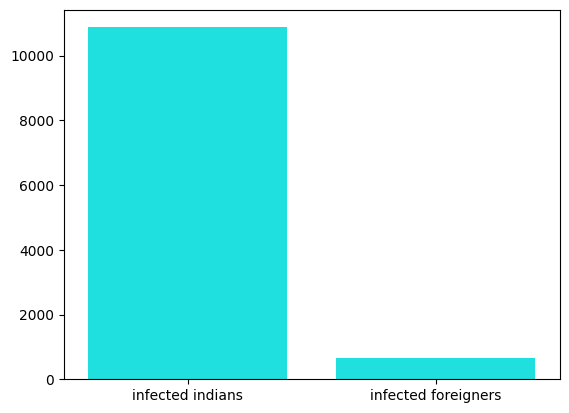

In [107]:
plot3=sns.barplot(data=stats,x=['infected indians','infected foreigners'],y=[confirmed_indians,confirmed_foreigns],color='cyan')
plt.show()

The number of INFECTED INDIANS is way larger than INFECTED FOREIGNERS.

In [27]:
stats['Active_cases'] = stats['Confirmed'] - (stats['Cured'] + stats['Deaths'])
stats.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
0,1.0,2020-01-30,6:00 PM,Kerala,1.0,0.0,0.0,0.0,1.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1.0,0.0,0.0,0.0,1.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2.0,0.0,0.0,0.0,2.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3.0,0.0,0.0,0.0,3.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3.0,0.0,0.0,0.0,3.0,3.0


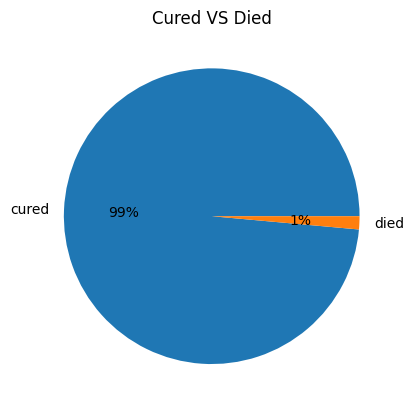

In [28]:
total_death=stats['Deaths'].sum()
total_cured=stats['Cured'].sum()
plt.pie([total_cured,total_death],labels=['cured','died'],autopct='%.0f%%')
plt.title("Cured VS Died")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'Kerala'),
  Text(1, 0, 'Telengana'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Rajasthan'),
  Text(4, 0, 'Uttar Pradesh'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Ladakh'),
  Text(7, 0, 'Tamil Nadu'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Maharashtra'),
  Text(10, 0, 'Punjab'),
  Text(11, 0, 'Jammu and Kashmir'),
  Text(12, 0, 'Andhra Pradesh'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Odisha'),
  Text(15, 0, 'Puducherry'),
  Text(16, 0, 'West Bengal'),
  Text(17, 0, 'Chhattisgarh'),
  Text(18, 0, 'Chandigarh'),
  Text(19, 0, 'Gujarat'),
  Text(20, 0, 'Himachal Pradesh'),
  Text(21, 0, 'Madhya Pradesh'),
  Text(22, 0, 'Bihar'),
  Text(23, 0, 'Manipur'),
  Text(24, 0, 'Mizoram'),
  Text(25, 0, 'Andaman and Nicobar Islands'),
  Text(26, 0, 'Goa'),
  Text(27, 0, 'Unas

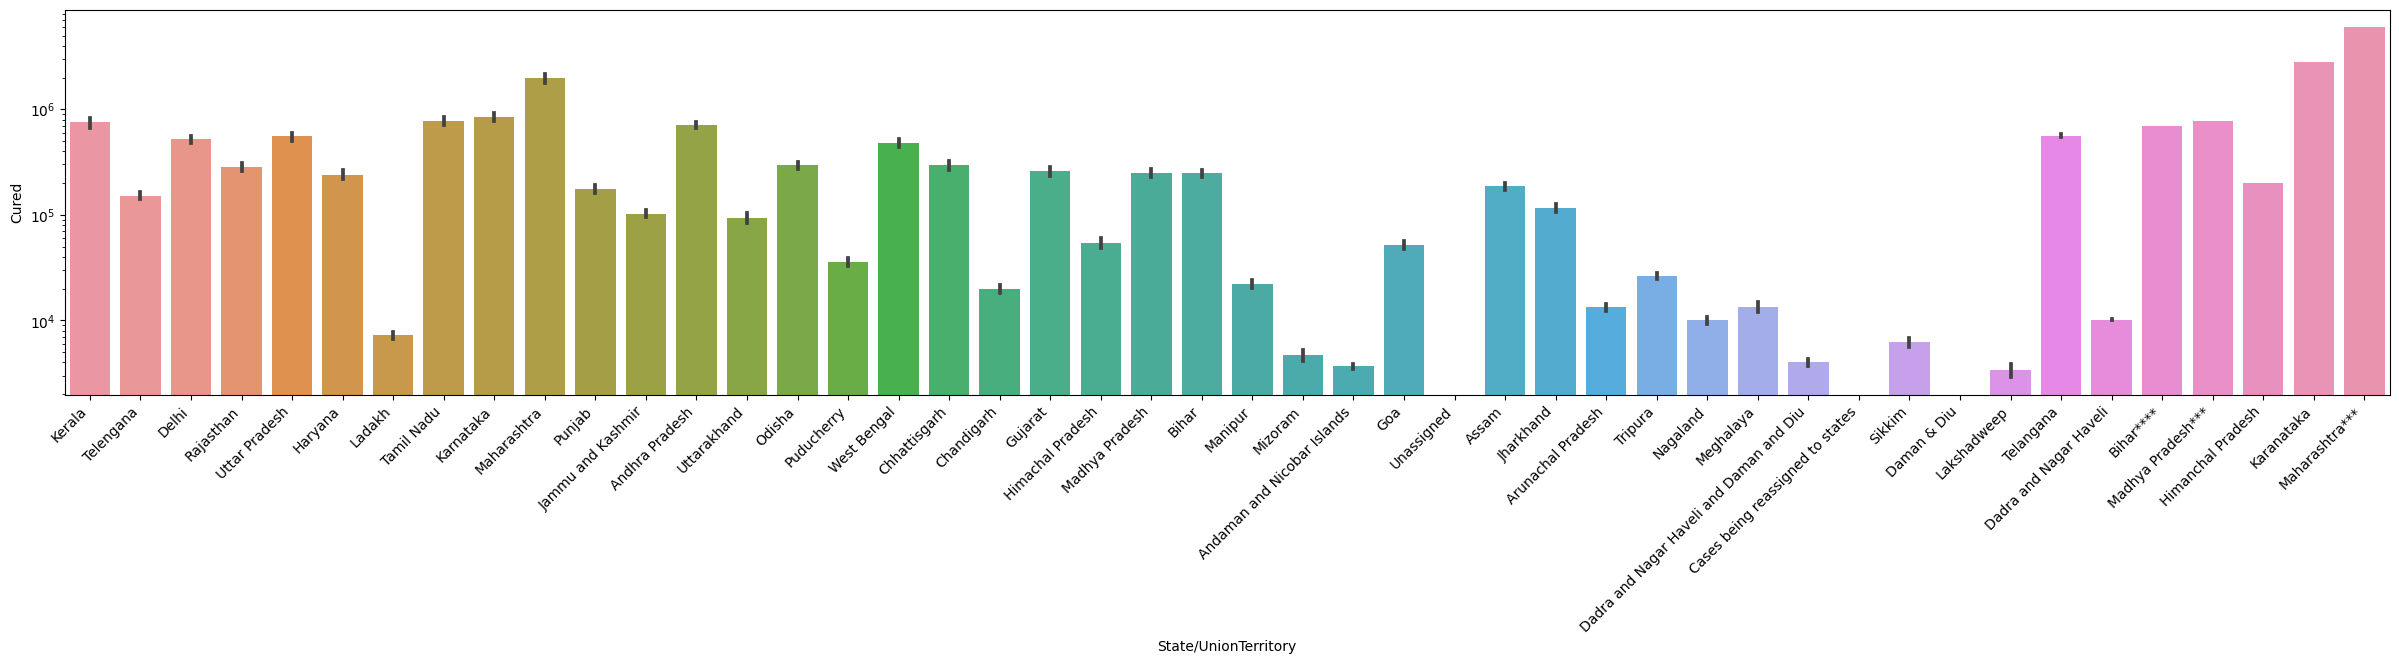

In [32]:
plt.subplots(figsize=(30, 5))
plot4=sns.barplot(data=stats,y=stats['Cured'],x=stats['State/UnionTerritory'])
plot4.set_yscale('log')
plt.xticks(rotation = 45, ha = 'right')


In [49]:
stats['month']=pd.DatetimeIndex(stats['Date']).month
stats['year']=pd.DatetimeIndex(stats['Date']).year

<Axes: xlabel='month', ylabel='Cured'>

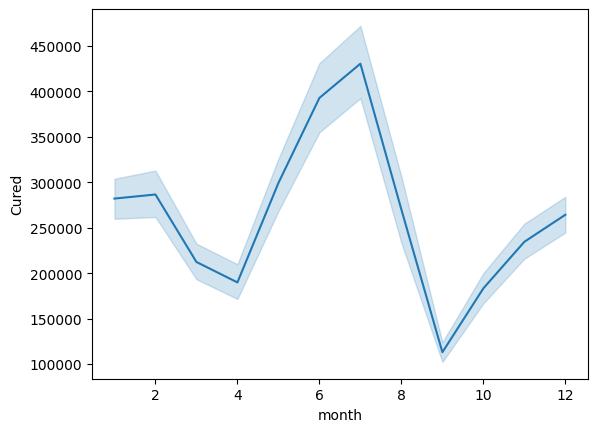

In [40]:
sns.lineplot(data=stats,x=stats['month'],y=stats['Cured'])

<Axes: xlabel='month', ylabel='Confirmed'>

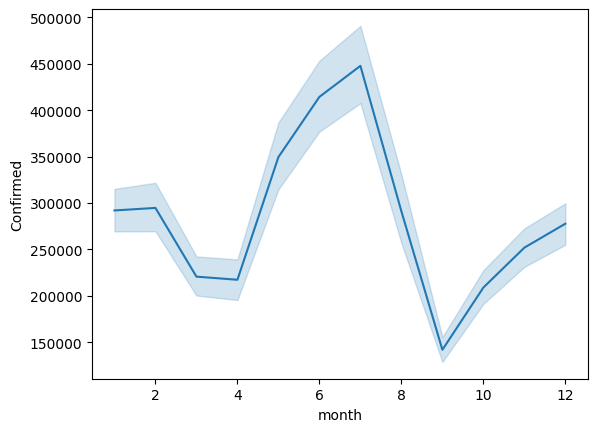

In [41]:
sns.lineplot(data=stats,x=stats['month'],y=stats['Confirmed'])

<Axes: xlabel='year', ylabel='Active_cases'>

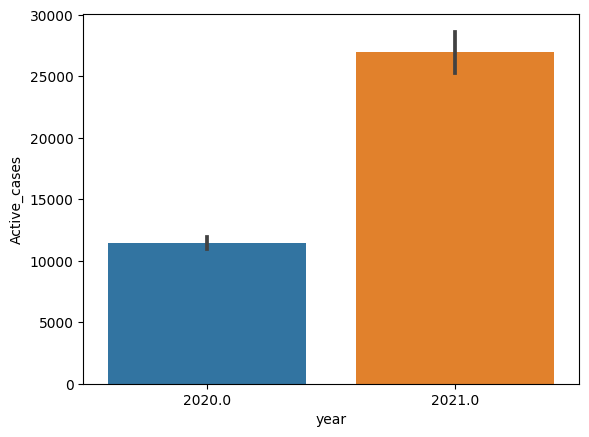

In [50]:
sns.barplot(data=stats,x=stats['year'],y=stats['Active_cases'])

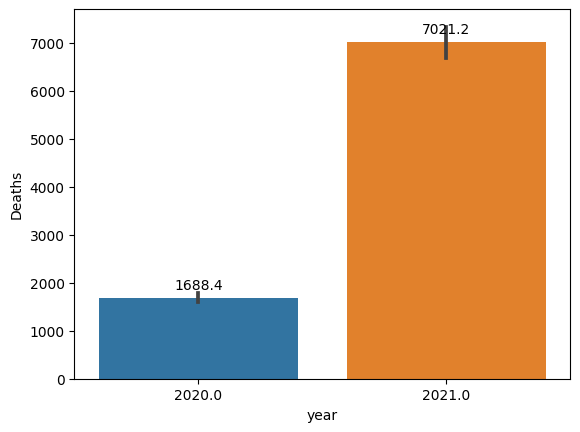

In [100]:
plot8=sns.barplot(data=stats,x=stats['year'],y=stats['Deaths'])
for g in plot8.patches:
    plot8.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Now we will be looking at the statewise vaccine data.

In [53]:
vaccine=pd.read_csv('covid_vaccine_statewise.csv')

In [54]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [55]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [56]:
vaccine.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [57]:
vaccine['Updated On']=pd.to_datetime(vaccine['Updated On'])

C:\Users\aditi\AppData\Local\Temp\ipykernel_18528\1274798303.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vaccine['Updated On']=pd.to_datetime(vaccine['Updated On'])


In [58]:
for col in vaccine.columns:
    if vaccine[col].dtype=='object':
        vaccine[col]=vaccine[col].fillna(value='unknown')
    else:
        vaccine[col]=vaccine[col].fillna(value=0)

In [59]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Updated On                           7845 non-null   datetime64[ns]
 1   State                                7845 non-null   object        
 2   Total Doses Administered             7845 non-null   float64       
 3   Sessions                             7845 non-null   float64       
 4    Sites                               7845 non-null   float64       
 5   First Dose Administered              7845 non-null   float64       
 6   Second Dose Administered             7845 non-null   float64       
 7   Male (Doses Administered)            7845 non-null   float64       
 8   Female (Doses Administered)          7845 non-null   float64       
 9   Transgender (Doses Administered)     7845 non-null   float64       
 10   Covaxin (Do

Text(0.5, 1.0, 'First Dose VS Second Dose')

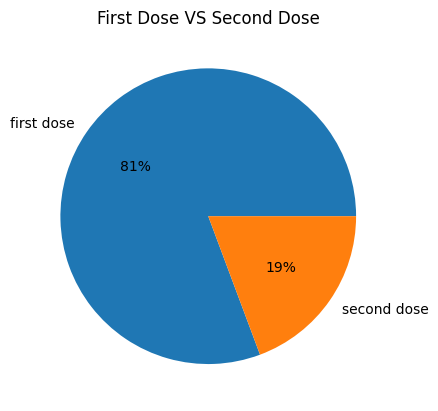

In [65]:
first_dose=vaccine['First Dose Administered'].sum()
second_dose=vaccine['Second Dose Administered'].sum()
plt.pie([first_dose,second_dose],labels=['first dose','second dose'],autopct='%.0f%%')
plt.title("First Dose VS Second Dose")

In [66]:
vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

Text(0, 0.5, 'Count')

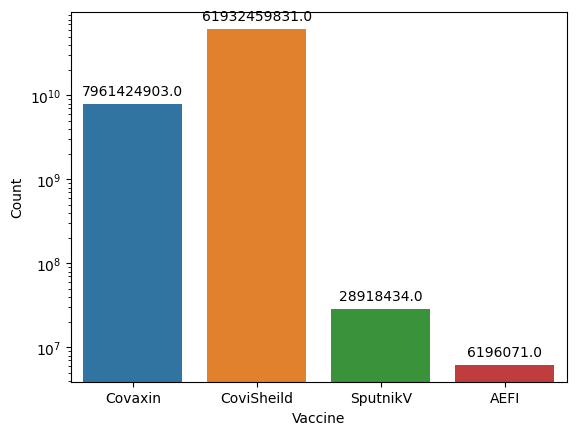

In [99]:
covaxin=vaccine[' Covaxin (Doses Administered)'].sum()
covisheild=vaccine['CoviShield (Doses Administered)'].sum()
sputnik=vaccine['Sputnik V (Doses Administered)'].sum()
aefi=vaccine['AEFI'].sum()
plot5=sns.barplot(data=vaccine,y=[covaxin,covisheild,sputnik,aefi],x=['Covaxin','CoviSheild','SputnikV','AEFI'])
plot5.set_yscale('log')
for g in plot5.patches:
    plot5.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel('Vaccine')
plt.ylabel('Count')

In [91]:
male=vaccine['Male(Individuals Vaccinated)'].sum()
female=vaccine['Female(Individuals Vaccinated)'].sum()
trans=vaccine['Transgender(Individuals Vaccinated)'].sum()


<Figure size 1000x700 with 0 Axes>

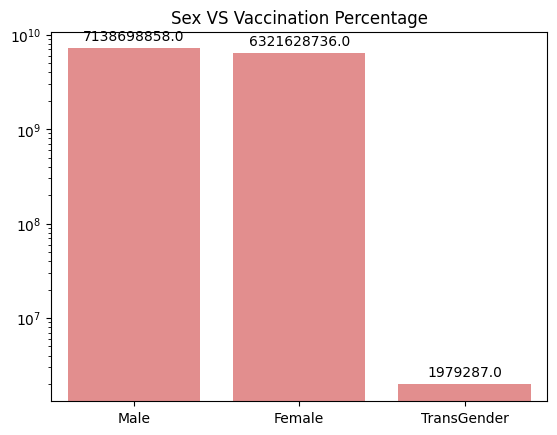

<Figure size 1000x700 with 0 Axes>

In [109]:
plot7=sns.barplot(data=vaccine,y=[male,female,trans],x=['Male','Female','TransGender'],color='lightcoral')
plot7.set_yscale('log')
plt.title('Sex VS Vaccination Percentage')
for g in plot7.patches:
    plot7.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.figure(figsize = (10, 7))

Text(0.5, 1.0, 'Age groups VS Vaccination Percentage')

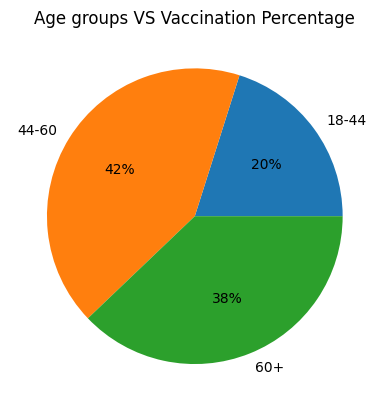

In [86]:
Age1=vaccine['18-44 Years(Individuals Vaccinated)'].sum()
Age2=vaccine['45-60 Years(Individuals Vaccinated)'].sum()
Age3=vaccine['60+ Years(Individuals Vaccinated)'].sum()
plt.pie([Age1,Age2,Age3],labels=['18-44','44-60','60+'],autopct='%.0f%%')
plt.title('Age groups VS Vaccination Percentage')

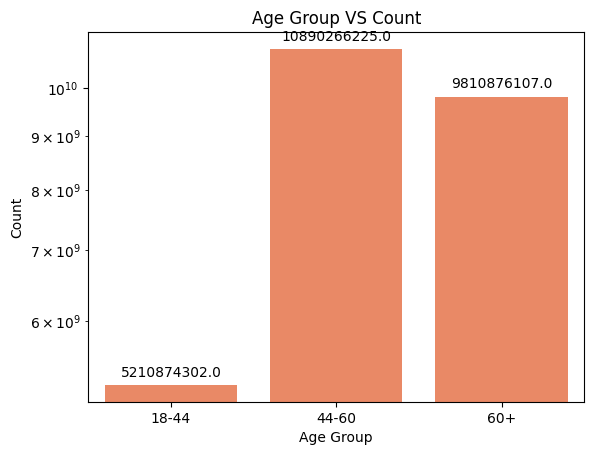

In [113]:
plot6=sns.barplot(data=vaccine,x=['18-44','44-60','60+'],y=[Age1,Age2,Age3],color='coral')
plot6.set_yscale('log')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group VS Count')
for g in plot6.patches:
    plot6.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [90]:
vaccine['Sessions'].sum()

3652256024.0